<Body>   
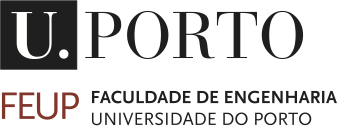   
<h1> <b>Machine Learning 2022/2023 (2<sup>nd</sup> semester) </b> </h1>
<p>Master in Electrical and Computer Engineering </p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  

**A. Pedro Aguiar** (pedro.aguiar@fe.up.pt),
**Aníbal Matos** (anibal@fe.up.pt),
**Daniel Costa** (danielgcosta@fe.up.pt),
**Rui Gonçalves** (rjpg@fe.up.pt)

FEUP, Feb. 2023

---


# **Project #01**

**Note:** This is to be done in group of **2** elements. Use this notebook to answer all the questions. At the end of the work, you should **upload** the **notebook** and a **pdf file** with a printout of the notebook with all the results in the **moodle** platform. 

**Deadlines:** Present the state of your work (and answer questions) on the week of **March 27** in your corresponding practical class. Upload the files until 23:59 of **April 7, 2023**.


---



In [ ]:
# To make a nice pdf file of this file, you have to do the following:
# - upload this file into the running folder (click on the corresponding left icon)
# Then run this (which will make a html file into the current folder):
!jupyter nbconvert --to html "ML_project1.ipynb"
# Then just download the html file and print it to pdf!

[NbConvertApp] Converting notebook ML_project1.ipynb to html
[NbConvertApp] Writing 1407345 bytes to ML_project1.html


# **Identification**

* **Group:** A02H
* **Name:** Duarte Ribeiro Afonso Branco
* **Student Number:** 201905327

* **Name:** Maria Inês Agostinho Simões
* **Student Number:** 201904665


---




**Initial setup:** To download the file **data-set.cvs**, run the next cell.

In [77]:
!wget -O dataset.csv.zip https://www.dropbox.com/s/9y0s2ogjovkwrbm/data-set.csv.zip?dl=0 --quiet
!unzip dataset.csv.zip -d. 


Archive:  dataset.csv.zip
replace ./data-set.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [78]:
# Then, run this code to get the data-set

import pandas as pd
df = pd.read_csv('data-set.csv', index_col=0)
df.head()
#df

# By convention, values that are zero signify no measurements.
# The units are:
# [m] for x and y
# [m/s] for the velocities vx and vy
# [m] for the LIDAR ranges

,time,x,y,vx,vy,angle -179,angle -178,angle -177,angle -176,angle -175,...,angle 171,angle 172,angle 173,angle 174,angle 175,angle 176,angle 177,angle 178,angle 179,angle 180
0,0.0,-3.946339,-2.912177,0.711051,-0.307325,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.1,0.000000,0.000000,0.678366,-0.308563,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.2,0.000000,0.000000,0.677682,-0.285029,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.3,0.000000,0.000000,0.648523,-0.293170,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.4,0.000000,0.000000,0.644965,-0.277222,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Part 1: Kalman filter design**



Consider a holonomic mobile robot in the 2D plan and suppose that one can get measurements from its linear velocity every time step $t=0, 0.1, 0.2, \ldots$ (in seconds) and its position every time step $t=0, 0.5, 1.0, 1.5 \ldots$ (in seconds). Suppose also that the measurements are corrupted by additive Gaussian noise and furthermore, the linear velocity measurements may also include a unknown but constant bias term. The goal is to obtain an estimate of the position of the robot together with a measure of its uncertainty. To this end, we will implement a Kalman filter (KF)!
 
### **Model:**
Let $(x_t, y_t)$ be the position of the robot at time step $t$, and $(v_{x,t}, v_{y,t})$ its linear velocity. Let $(b_{x,t}, b_{y,t})$ be the bias term and $w_t$ and $\eta_t$ Gaussian noises. Then, a state-space model to design the KF can be written as


*x-direction*
\begin{align*}
\begin{bmatrix}
x_{t+1} \\
b_{x,t+1}
\end{bmatrix}
&= \begin{bmatrix}
1 &h \\
0 &1
\end{bmatrix}
\begin{bmatrix}
x_{t} \\
b_{x,t}
\end{bmatrix}
+\begin{bmatrix}
h \\
0
\end{bmatrix}
v_{x,t}
+ w_{x,t} \quad t=0, 0.1, 0.2, \ldots \\
z_{x,t} &= 
\begin{bmatrix}
1 & 0
\end{bmatrix}
\begin{bmatrix}
x_{t} \\
b_{x,t}
\end{bmatrix} +  \eta_{x,t}, \quad t=0, 0.5, 1.0, 1.5 \ldots
\end{align*}

*y-direction*
\begin{align*}
\begin{bmatrix}
y_{t+1} \\
b_{y,t+1}
\end{bmatrix}
&= \begin{bmatrix}
1 &h \\
0 &1
\end{bmatrix}
\begin{bmatrix}
y_{t} \\
b_{y,t}
\end{bmatrix}
+\begin{bmatrix}
h \\
0
\end{bmatrix}
v_{y,t}
+ w_{y,t} \quad t=0, 0.1, 0.2, \ldots \\
z_{y,t} &= 
\begin{bmatrix}
1 & 0
\end{bmatrix}
\begin{bmatrix}
y_{t} \\
b_{y,t}
\end{bmatrix} +  \eta_{y,t}, \quad t=0, 0.5, 1.0, 1.5 \ldots
\end{align*}
where $(z_{x,t}, z_{y,t})$ is the output vector and $h=0.1\,s$ is the sample time.

**Note:** We have decomposed the model in two decoupled parts (x and y directions). Thus, it is possible to design a KF for each direction.

**1.1** 
Implement 2 KFs (one for each direction) and display the evolution along time of the estimated position of the robot and the estimated bias term. Display also the estimated trajectory 2D.

In [79]:
import numpy as np
from numpy import * 
import matplotlib.pyplot as plt

time = df["time"].values
x = df["x"].values
y = df["y"].values
vx = df["vx"].values
vy = df["vy"].values



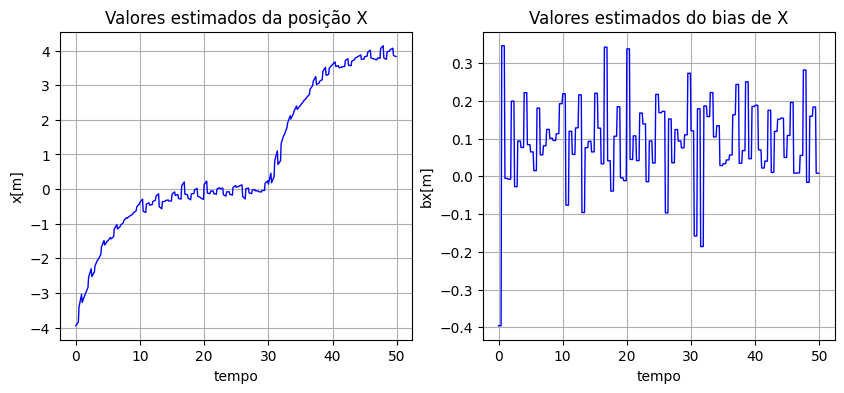

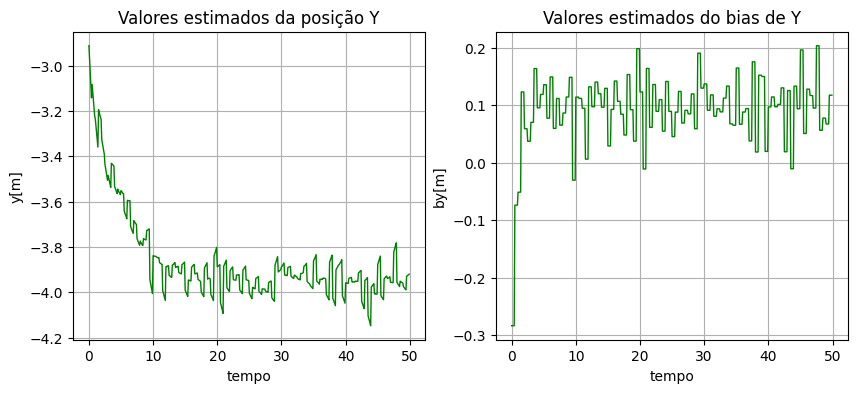

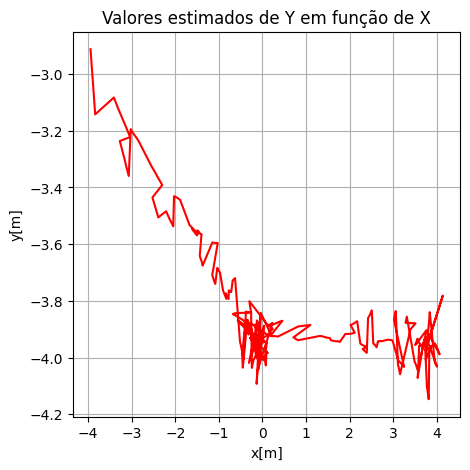

In [80]:
from numpy import dot 
from numpy.linalg import inv 
from numpy.linalg import det
import random

#############
# Functions #
#############

def kf_predict(X, P, A, Q, B, U): 

  X = A @ X + B @ U 
  P = A @ P @ A.T + Q 

  return(X,P) 

def kf_update(X, P, Y, H, R): 
  E = Y- H @ X
  S = H @ P @ H.T + R  
  K = P @ H.T @ inv(S) 
  X = X + K @ E
  P = P - K @ S @ K.T 

  return (X,P) 


######################
# Plotting Variables #
######################

t_time = []      
x_time = []      # x position over time (mean)
y_time = []      # y position over time (mean)
bx_time = []     # x bias over time (mean)
by_time = []     # y bias over time (mean)
x_std_time = []   # x position over time (std_dev)
y_std_time = []   # y position over time (std_dev)
bx_std_time = []   # x bias over time (std_dev)
by_std_time = []   # y bias over time (std_dev)
x_up_time = []   # x mean + std_dev
y_up_time = []   # y mean + std_dev
x_dn_time = []   # x mean - std_dev
y_dn_time = []   # y mean - std_dev
bx_up_time = []   # bx mean + std_dev
by_up_time = []   # by mean + std_dev
bx_dn_time = []   # bx mean - std_dev
by_dn_time = []   # by mean - std_dev

xx = []
yy = []
bx = [] #real x bias
by = []


##################
# Initial Values #
##################

h = 0.1
std_meas = 0.1
std_acc = 0.05
bias = 0.1

# init state
Xx = np.array( [ [0.0] , [0.0] ] ) 

Xy = np.array( [ [0.0] , [0.0] ] ) 
# init covariance 
Px = np.array( [ [ 999.0, 0.0 ] ,
                [ 0.0, 999.0 ] ] )

Py = np.array( [ [ 999.0, 0.0 ] ,
                [ 0.0, 999.0 ] ] )
                

# state matrix
A = np.array( [ [1.0, h] , 
                [0.0, 1.0] ] )
# input effect matrix
B = np.array( [ [h], [0.0] ] )
# measurement matrix
H = np.array( [ [1.0, 0.0] ] )

# measurement noise
R = np.array( [ [std_meas**2] ] )

# process noise
#Q = np.array( [ [(h**4)/4, (h**3)/2] 
#                [(h**3)/2, (h**2)  ] ])*std_acc  
Q = np.array(np.eye(2) * 5 ) 


######################
# Kalman Filter loop #
######################

N_iter = len(time)
  
for t in arange (0, N_iter):

  Ux = np.array( [ [ vx[t]  ] ] ) # real velocity, corrupted + bias
  Uy = np.array( [ [ vy[t]  ] ] )

  Yx = np.array( [ [ 1*x[t]  ] ] )  # real position, corrupted 
  Yy = np.array( [ [ 1*y[t]  ] ] )

  (Xx, Px) = kf_predict(Xx, Px, A, Q, B, Ux) 
  (Xy, Py) = kf_predict(Xy, Py, A, Q, B, Uy)

  if t%5 == 0:
    (Xx, Px) = kf_update(Xx, Px, Yx, H, R)
    (Xy, Py) = kf_update(Xy, Py, Yy, H, R) 
  

  xx.append(x[t]) # guardar valores reais de x
  yy.append(y[t]) # guardar valores reais de y

  bx.append(bias)
  by.append(bias)
  
  t_time.append(time[t])

  x_time.append(Xx[0].item())
  y_time.append(Xy[0].item())
  bx_time.append(Xx[1].item())
  by_time.append(Xy[1].item())
  x_std_time.append( sqrt( Px[0][0]).item() )
  y_std_time.append( sqrt( Py[0][0]).item() )
  bx_std_time.append( sqrt( Px[1][1]).item() )
  by_std_time.append( sqrt( Py[1][1]).item() )
  x_up_time.append( Xx[0].item() + sqrt( Px[0][0]).item() )
  y_up_time.append( Xy[0].item() + sqrt( Py[0][0]).item() )
  x_dn_time.append( Xx[0].item() - sqrt( Px[0][0]).item() )
  y_dn_time.append( Xy[0].item() - sqrt( Py[0][0]).item() )
  bx_up_time.append( Xx[1].item() + sqrt( Px[1][1]).item() )
  by_up_time.append( Xy[1].item() + sqrt( Py[1][1]).item() )
  bx_dn_time.append( Xx[1].item() - sqrt( Px[1][1]).item() )
  by_dn_time.append( Xy[1].item() - sqrt( Py[1][1]).item() )


############
# Plotting #
############

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(t_time, x_time, label='x', c="b", linewidth=1)
plt.ylabel('x[m]')
plt.xlabel('tempo')
plt.title("Valores estimados da posição X")
plt.grid()


plt.subplot(122)
plt.plot(t_time, bx_time, label='bx', c="b", linewidth=1)
plt.ylabel('bx[m]')
plt.xlabel('tempo')
plt.title("Valores estimados do bias de X")
plt.grid()

plt.show()


plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(t_time, y_time, label='y', c="g", linewidth=1)
plt.ylabel('y[m]')
plt.xlabel('tempo')
plt.title("Valores estimados da posição Y")
plt.grid()


plt.subplot(122)
plt.plot(t_time, by_time, label='by', c="g", linewidth=1)
plt.ylabel('by[m]')
plt.xlabel('tempo')
plt.title("Valores estimados do bias de Y")
plt.grid()

plt.show()


plt.figure(figsize=(5,5))
plt.plot(x_time, y_time, label='xy', c="r")
#plt.legend(loc='upper left')
plt.title("Valores estimados de Y em função de X")
plt.ylabel('y[m]')
plt.xlabel('x[m]')
plt.grid()
plt.show()


plt.show()




# **Part 2: Linear Regression**



In this part, the aim is to build a map of the environment by combining the position of the robot with the measurements of the 2D **LIDAR** that is on-board of the robot. The LIDAR measurements consist of range (distance) from the robot to a possible obstacle for each degree of direction, that is, 
$$
r_t = \{r_\beta + \eta_r : \beta=-179^o, -178^o, \ldots, 0^o, \ldots, 180^o\}
$$
where $\eta_r$ is assumed to be Gaussian noise. The sample time is the same, that is, $h=0.1\,s$, but the LIDAR measurements are outputted every time step $t=0,0.5,1.0, 1.5, \ldots$ (in seconds) like the robot position in the previous exercise. Moreover, if there is no obstacle within the direction of the laser range or if it is far away, that is, if the distance is greater than $5\,m$, by convention the range measurement is set to zero. It may also happen that the LIDAR in some cases may output an *outlier*.

The next figure shows $r_t$ as a function of the angle $\beta$ for $t=5.0\,s$.

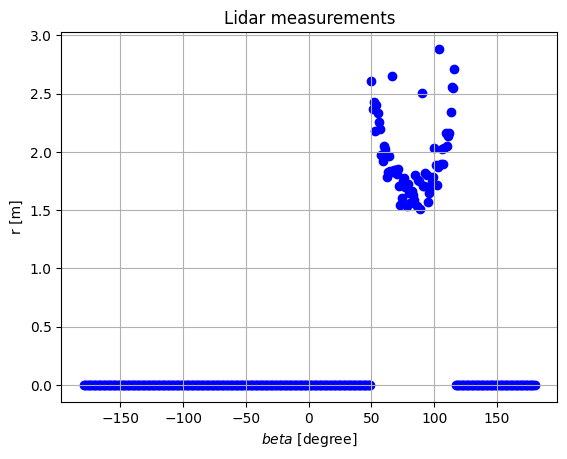

In [81]:

time = df["time"].values
Lidar_range = df.iloc[:, np.arange(5,365,1)].values

t=5*10 # t = 5 sec * 1/sample_time
angle = np.linspace(-179, 180, num=360)

plt.figure()
plt.scatter(angle, Lidar_range[t], color='b')
plt.title('Lidar measurements')
plt.ylabel('r [m]')
plt.xlabel('$beta$ [degree]')
plt.grid();



**2.1**
Using the estimated position of the robot (computed in the previous exercise) and the LIDAR data, 
1. Obtain the cloud points in the 2D plan that the robot sense at **$t=5\,s$** and plot them. Do not forget to remove the zero ranges and note that  

$$
\begin{align*}
\hat x_{o,t} = \hat x_t + r_t \cos\beta \\
\hat y_{o,t} = \hat y_t + r_t \sin\beta
\end{align*}
$$

2. Perform a linear regression for the previous data using a model of the type
\begin{equation} \color{red} { y = \theta_0 + \theta_1 x } 
 \end{equation}
and display the results, that is, display the resulting 2d map, the mean square error, and the optimal parameters for $\color{red} \theta$. To this end, apply the related Least Square (LS) normal equations and **only use** the sklearn to confirm the obtained values.



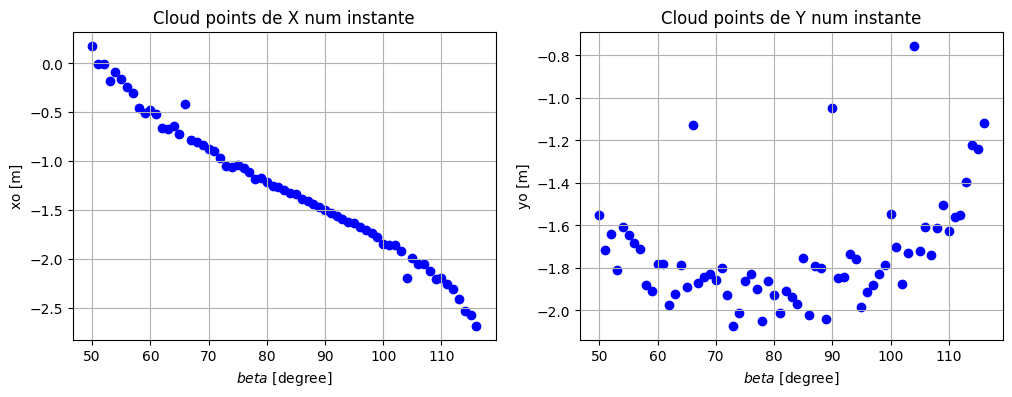

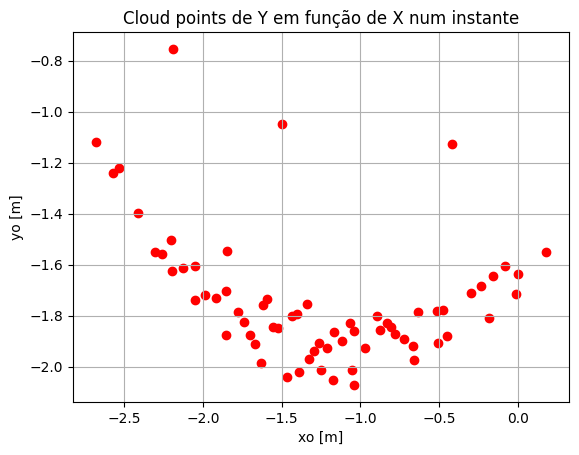

In [82]:
# Part 2.1.1

#############
# Variáveis #
#############

x_o, y_o, angleNotZero = [], [], []

t=5*10 # t = 5 sec * 1/sample_time

#####################################
# Loop para guardar os cloud points #
#####################################

for i in range(len(Lidar_range[t])):
  if Lidar_range[t][i] > 0:
    x_o.append(x_time[t] + Lidar_range[t][i]*np.cos(angle[i]*np.pi/180) ) # input é beta, output é x_o e y_o
    y_o.append(y_time[t] + Lidar_range[t][i]*np.sin(angle[i]*np.pi/180) )
    angleNotZero.append(angle[i])

############
# Plotting #
############

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(angleNotZero, x_o, color='b')
plt.ylabel('xo [m]')
plt.xlabel('$beta$ [degree]')
plt.title('Cloud points de X num instante')
plt.grid();

plt.subplot(122)
plt.scatter(angleNotZero, y_o, color='b')
plt.ylabel('yo [m]')
plt.xlabel('$beta$ [degree]')
plt.title('Cloud points de Y num instante')
plt.grid();

plt.figure()
plt.scatter(x_o, y_o, color='r')
plt.ylabel('yo [m]')
plt.xlabel('xo [m]')
plt.title('Cloud points de Y em função de X num instante')
plt.grid();

plt.show()


*******************************
* REGRESSÃO LINEAR COM GRAU 1 *
*******************************


THETA:
 [-1.89406508]
 [-0.12289806]


MSE:

 0.056577742699758245




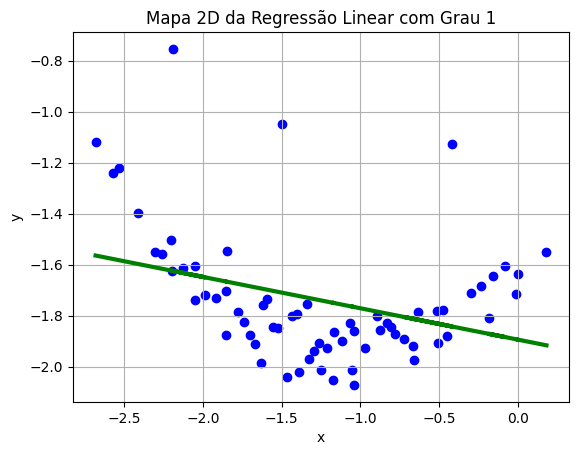



***********
* SKLEARN *
***********


THETA_SKLEARN:
 [-1.89406508]
 [[-0.12289806]]


MSE_SKLEARN:

 0.056577742699758245




In [83]:
# Part 2.1.2
from scipy import linalg
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

###########
# Funções #
###########

def our_mean_square_error(Y, Yregression):
  return np.mean(np.square(Y-Yregression))

def printTheta(model):
  print("", model.intercept_)
  #for i in range(model.coef_.size):
  print("", model.coef_)

################
# Least Square #
################

X = np.ones( ( len(angleNotZero), 1 ), dtype = float)
X = np.concatenate((X, np.array(x_o).T.reshape(-1, 1)), axis=1)

Y = y_o
Y = np.array(Y).T.reshape(-1, 1)

theta = linalg.inv(X.T @ X) @ X.T @ Y
theta = np.array(theta).T.reshape(-1, 1)

Y_regression = X @ theta

MSE = our_mean_square_error(Y, Y_regression)

print("*******************************")
print("* REGRESSÃO LINEAR COM GRAU 1 *")
print("*******************************")

print('\n')
print("THETA:\n", theta[0])
print("", theta[1])
print('\n')
print("MSE:\n\n", MSE)
print('\n')

plt.figure()
plt.scatter(x_o, Y, color="b")
plt.plot(x_o, Y_regression,  color="g", linewidth=3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Mapa 2D da Regressão Linear com Grau 1')
plt.grid()
plt.show()

###########
# Sklearn #
###########

model = linear_model.LinearRegression()
model.fit(X[:, 1].reshape(-1, 1), Y)

MSE_sklearn = mean_squared_error(Y, Y_regression)

print('\n')
print("***********")
print("* SKLEARN *")
print("***********")

print('\n')
print("THETA_SKLEARN:")
printTheta(model)
print('\n')
print("MSE_SKLEARN:\n\n", MSE_sklearn)
print('\n')


**2.2**
Repeat the previous exercise but now with a polynomial model of the type
\begin{equation} \color{red} { y = \theta_0 + \theta_1 x + \theta_2 x^2 } 
 \end{equation}



*******************************
* REGRESSÃO LINEAR COM GRAU 2 *
*******************************


THETA GRAU 2:
 [-1.58597533]
 [0.59987578]
 [0.28829671]


MSE GRAU 2: 0.031683826846264786




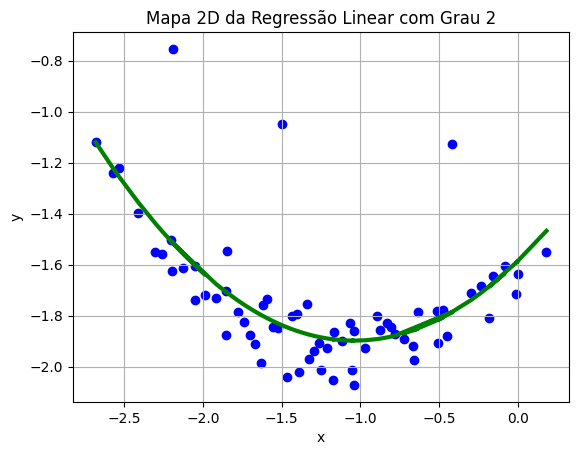



***********
* SKLEARN *
***********


THETA GRAU 2 SKLEARN:
 [-1.58597533]
 [[0.59987578 0.28829671]]


MSE GRAU 2 SKLEARN:

 0.031683826846264786


In [84]:
# Part 2.1.2
from scipy import linalg
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

################
# Least Square #
################

print("*******************************")
print("* REGRESSÃO LINEAR COM GRAU 2 *")
print("*******************************")

X_2 = np.ones( ( len(angleNotZero), 1 ), dtype = float)
X_2 = np.concatenate((X_2, np.array(x_o).T.reshape(-1, 1)), axis=1)
X_2 = np.concatenate((X_2, np.array(np.square(x_o)).T.reshape(-1, 1)), axis=1)

Y_2 = y_o
Y_2 = np.array(Y_2).T.reshape(-1, 1)

theta_2 = linalg.inv(X_2.T @ X_2) @ X_2.T @ Y_2
theta_2 = np.array(theta_2).T.reshape(-1, 1)

Y_2regression = X_2 @ theta_2

MSE_2 = our_mean_square_error(Y_2, Y_2regression)

print("\n")
print("THETA GRAU 2:\n", theta_2[0])
print("", theta_2[1])
print("", theta_2[2])
print("\n")
print("MSE GRAU 2:", MSE_2)
print("\n")

plt.figure()
plt.scatter(x_o, Y_2, color="b")
plt.plot(x_o, Y_2regression,  color="g", linewidth=3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Mapa 2D da Regressão Linear com Grau 2')
plt.grid()
plt.show()

###########
# Sklearn #
###########

model_2 = linear_model.LinearRegression()
model_2.fit(X_2[:, 1:].reshape(-1, 2), Y_2)

MSE_2sklearn = mean_squared_error(Y_2, Y_2regression)

print("\n")

print("***********")
print("* SKLEARN *")
print("***********")

print("\n")
print("THETA GRAU 2 SKLEARN:")
printTheta(model_2)
print("\n")
print("MSE GRAU 2 SKLEARN:\n\n", MSE_2sklearn)


**2.3**
At this point you can use sklearn! 
Do the same as the previous exercise (polynomial model) but now with **degree 10**. Moreover, implement also a regression with **Ridge** regularization and a regression with **LASSO** regularization. Do not forget to display the obtained results. What can you conclude?




# **RESPOSTA**

<font color='red'> A regularização RIDGE e LASSO penalizam a complexidade do modelo, resolvendo o problema de overfitting, ou seja, quando o modelo está demasiado relacionado com os dados de treino, obtendo-se um modelo mais flexível.</font>

<font color='red'> A regularização RIDGE procura simplicar o modelo, diminuindo a norma do vetor Θ, ou seja, minimizando coeficientes.</font>

<font color='red'> A regularizaçãO LASSO procura simplificar o modelo, penalizando os valores absolutos dos coeficientes, igualando alguns destes a zero.</font>

<font color='red'> Assim sendo, como esperado, verifica-se o aumento do MSE para as regularizações RIDGE e LASSO em relação à LS, visto que o modelo é simplificado. </font>




********************
* REGRESSÃO LINEAR *
********************




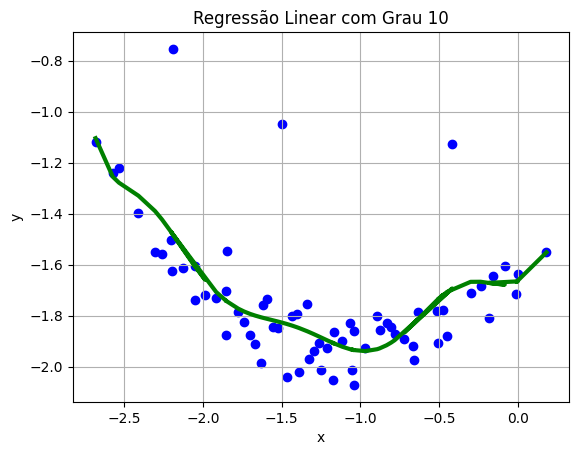



THETA GRAU 10 SKLEARN:

 -1.665206634501296
 [  0.32613684   2.25044584   1.63121606 -17.57074788 -44.69848968
 -47.39716718 -26.91117735  -8.53207972  -1.42001932  -0.09624344]


MSE GRAU 10 SKLEARN:

 0.030178196986727437




*******************
* REGRESSÃO RIDGE *
*******************




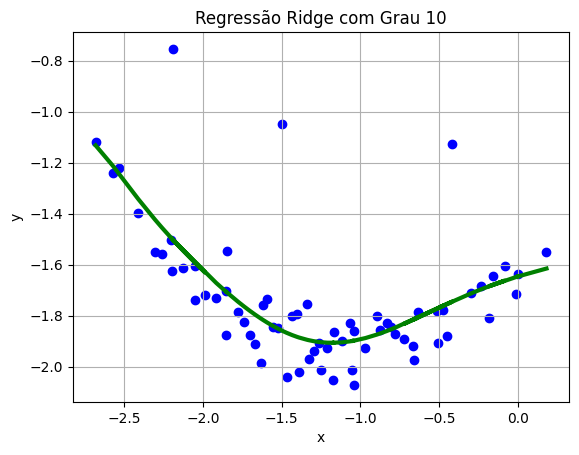



THETA GRAU 10 RIDGE (SKLEARN):

 -1.6462143873760302
 [ 0.18929872 -0.11217863  0.02942209  0.03688728 -0.05205557  0.02009901
  0.01948032 -0.0138214  -0.01020983 -0.00161385]


MSE GRAU 10 RIDGE (SKLEARN):

 0.03120220077665272




*******************
* REGRESSÃO LASSO *
*******************




/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.196e-01, tolerance: 4.299e-04
  model = cd_fast.enet_coordinate_descent(


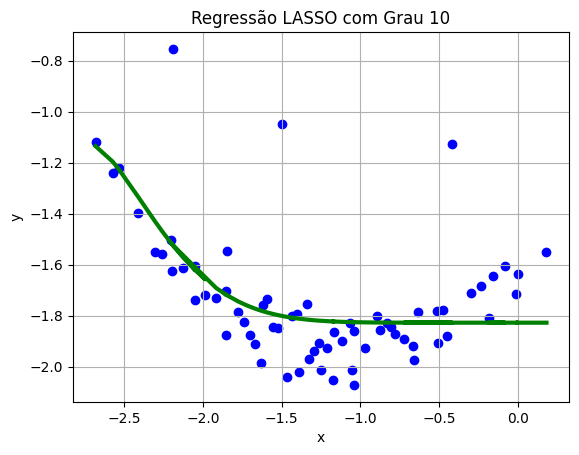



THETA GRAU 10 LASSO (SKLEARN):

 -1.8276518648301314
 [ 0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.10965168e-03  5.02938279e-04
 -0.00000000e+00 -9.15219348e-05]


MSE GRAU 10 LASSO (SKLEARN):

 0.03745167343057558




In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

####################
# Regressão Linear #
####################

poly_10 = PolynomialFeatures(degree=10)
X_10 = poly_10.fit_transform(np.array(x_o).T.reshape(-1, 1))

Y_10 = y_o

model_10 = LinearRegression()
model_10.fit(X_10[:, 1:].reshape(-1, 10), Y_10)

Y_10predict = model_10.predict(X_10[:, 1:].reshape(-1, 10))

print("********************")
print("* REGRESSÃO LINEAR *")
print("********************")
print("\n")

plt.figure()
plt.scatter(x_o, Y_10, color="b")
plt.plot(x_o, Y_10predict,  color="g", linewidth=3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regressão Linear com Grau 10')
plt.grid()
plt.show()

MSE_10sklearn_LS = mean_squared_error(Y_10, Y_10predict)


print("\n")
print("THETA GRAU 10 SKLEARN:\n")
printTheta(model_10)
print("\n")
print("MSE GRAU 10 SKLEARN:\n\n", MSE_10sklearn_LS)
print("\n")


#########
# Ridge #
#########

ridge_10 = Ridge(alpha=0.5)
ridge_10.fit(X_10[:, 1:].reshape(-1, 10), Y_10)

Y_10predict_ridge = ridge_10.predict(X_10[:, 1:].reshape(-1, 10))

print('\n')
print("*******************")
print("* REGRESSÃO RIDGE *")
print("*******************")
print('\n')

plt.figure()
plt.scatter(x_o, Y_10, color="b")
plt.plot(x_o, Y_10predict_ridge,  color="g", linewidth=3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regressão Ridge com Grau 10')
plt.grid()
plt.show()

MSE_10sklearn_ridge = mean_squared_error(Y_10, Y_10predict_ridge)

print("\n")
print("THETA GRAU 10 RIDGE (SKLEARN):\n")
printTheta(ridge_10)
print("\n")
print("MSE GRAU 10 RIDGE (SKLEARN):\n\n", MSE_10sklearn_ridge)
print("\n")

#########
# LASSO #
#########

lasso_10 = Lasso(alpha=0.1)
lasso_10.fit(X_10[:, 1:].reshape(-1, 10), Y_10)

Y_10predict_lasso = lasso_10.predict(X_10[:, 1:].reshape(-1, 10))

print('\n')
print("*******************")
print("* REGRESSÃO LASSO *")
print("*******************")
print('\n')

plt.figure()
plt.scatter(x_o, Y_10, color="b")
plt.plot(x_o, Y_10predict_lasso ,  color="g", linewidth=3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regressão LASSO com Grau 10')
plt.grid()
plt.show()

MSE_10sklearn_lasso = mean_squared_error(Y_10, Y_10predict_lasso )

print("\n")
print("THETA GRAU 10 LASSO (SKLEARN):\n")
printTheta(lasso_10)
print("\n")
print("MSE GRAU 10 LASSO (SKLEARN):\n\n", MSE_10sklearn_lasso)
print("\n")




**2.4**
We now would like to use all the LIDAR data. One simple option (off-line) is to make a data set with all the cloud point positions in 2D and apply the linear regression techniques.

Using sklearn, do this for LS, LS+Ridge, LS+LASSO using the polynomial model of degree 10. Display the results (map 2D) and the optimal values for 
$\color{pink} \theta$.


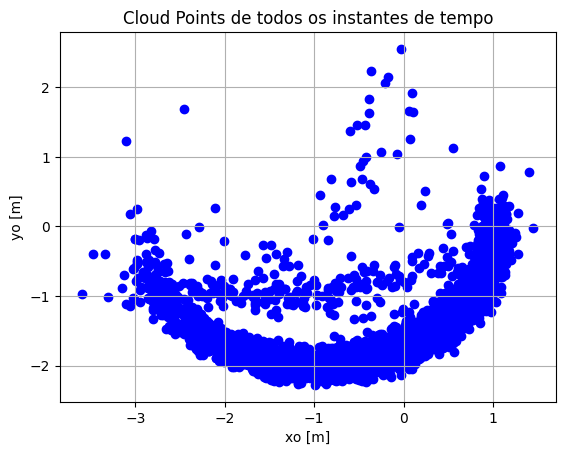



********************
* REGRESSÃO LINEAR *
********************




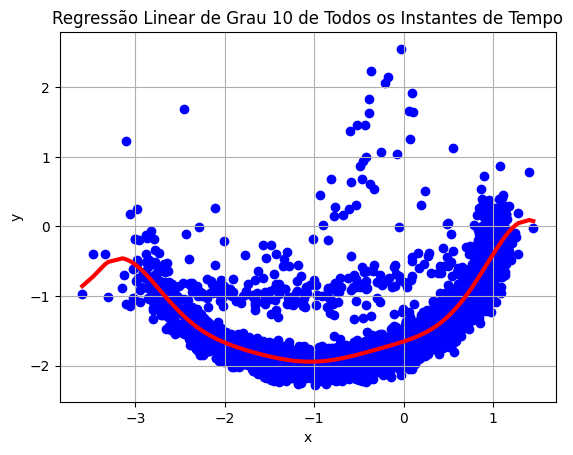



THETA GRAU 10 REGRESSÃO LINEAR (SKLEARN) DE TODOS OS PONTOS:

 -1.6522531963413771
 [ 0.42416739  0.26377298  0.54582161  0.45784155 -0.16287775 -0.27417453
 -0.04873969  0.03363718  0.01414177  0.00150746]


MSE GRAU 10 REGRESSÃO LINEAR (SKLEARN) DE TODOS OS PONTOS:

 0.11748416030678224




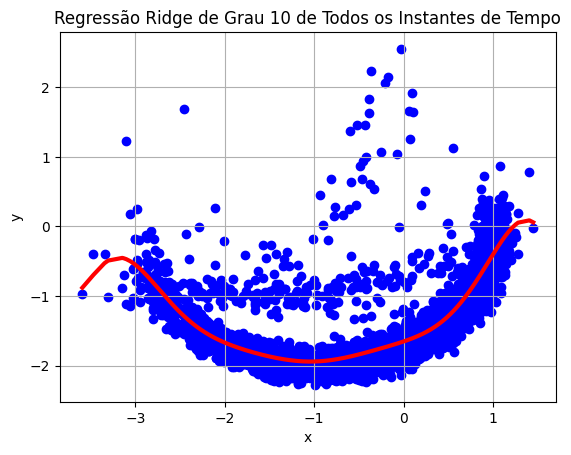



THETA GRAU 10 REGRESSÃO RIDGE (SKLEARN) DE TODOS OS PONTOS:

 -1.6520023795395726
 [ 0.43568708  0.26621608  0.50207819  0.4366428  -0.12495764 -0.24600645
 -0.05313569  0.02480055  0.01144436  0.00124491]


MSE GRAU 10 REGRESSÃO RIDGE (SKLEARN) DE TODOS OS PONTOS:

 0.11748764535214312




/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.785e+02, tolerance: 1.561e-01
  model = cd_fast.enet_coordinate_descent(


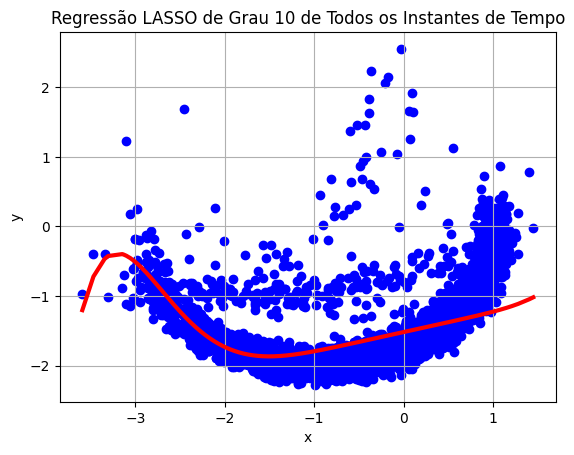



THETA GRAU 10 REGRESSÃO LASSO (SKLEARN) DE TODOS OS PONTOS:

 -1.5171640605038437
 [ 2.83895460e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  8.79176619e-03  7.37965712e-04 -3.36423732e-04
  9.59257122e-05  1.96298900e-05]


MSE GRAU 10 REGRESSÃO LASSO (SKLEARN) DE TODOS OS PONTOS:

 0.17953690081771295




In [86]:
###########################
# POSIÇÕES DO CLOUD POINT #
###########################

xo_all = []
yo_all = []

for j in range(len(time)):

  for i in range(len(Lidar_range[j])):
    
    if Lidar_range[j][i] > 0:
      xo_all.append(x_time[j] + Lidar_range[j][i]*np.cos(angle[i]*np.pi/180) ) 
      yo_all.append(y_time[j] + Lidar_range[j][i]*np.sin(angle[i]*np.pi/180) )


plt.figure()
plt.scatter(xo_all, yo_all, color='b')
plt.ylabel('yo [m]')
plt.xlabel('xo [m]')
plt.title('Cloud Points de todos os instantes de tempo')
plt.grid();
plt.show()

####################
# REGRESSÃO LINEAR #
####################

poly_10_all = PolynomialFeatures(degree=10, include_bias=False)
X_10_all = poly_10_all.fit_transform(np.array(xo_all).T.reshape(-1, 1))

Y_10_all = yo_all

model_10_all = LinearRegression()
model_10_all.fit(X_10_all, Y_10_all)

Y_10predict_all = model_10_all.predict(X_10_all)

print('\n')
print("********************")
print("* REGRESSÃO LINEAR *")
print("********************")
print('\n')

plt.figure()
plt.scatter(xo_all, Y_10_all, color="b")
plt.grid()
#xo_all_plot = np.linspace(min(xo_all), max(xo_all), 1000).reshape(-1, 1)
xo_all_plot = sorted(xo_all)
xo_all_plot = np.array(xo_all_plot).T.reshape(-1, 1)
Y_10predict_all_plot = model_10_all.predict(poly_10_all.fit_transform(xo_all_plot))
plt.plot(xo_all_plot, Y_10predict_all_plot, color='r', linewidth=3)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Regressão Linear de Grau 10 de Todos os Instantes de Tempo")
plt.show()

MSE_10sklearn_LS_all = mean_squared_error(Y_10_all, Y_10predict_all)

print('\n')
print("THETA GRAU 10 REGRESSÃO LINEAR (SKLEARN) DE TODOS OS PONTOS:\n")
printTheta(model_10_all)
print('\n')
print("MSE GRAU 10 REGRESSÃO LINEAR (SKLEARN) DE TODOS OS PONTOS:\n\n", MSE_10sklearn_LS_all)
print('\n')

#########
# RIDGE #
#########

ridge_10_all = Ridge(alpha=0.5)

ridge_10_all.fit(X_10_all, Y_10_all)

Y_10predict_ridge_all = ridge_10_all.predict(X_10_all)

plt.figure()
plt.scatter(xo_all, Y_10_all, color="b")
Y_10predict_ridge_all_plot = ridge_10_all.predict(poly_10_all.fit_transform(xo_all_plot))
plt.plot(xo_all_plot, Y_10predict_ridge_all_plot, color='r', linewidth=3)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Regressão Ridge de Grau 10 de Todos os Instantes de Tempo")
plt.grid()
plt.show()

MSE_10sklearn_ridge_all = mean_squared_error(Y_10_all, Y_10predict_ridge_all)

print('\n')
print("THETA GRAU 10 REGRESSÃO RIDGE (SKLEARN) DE TODOS OS PONTOS:\n")
printTheta(ridge_10_all)
print('\n')
print("MSE GRAU 10 REGRESSÃO RIDGE (SKLEARN) DE TODOS OS PONTOS:\n\n", MSE_10sklearn_ridge_all)
print('\n')

#########
# LASSO #
#########

lasso_10_all = Lasso(alpha=0.1)
lasso_10_all.fit(X_10_all, Y_10_all)

Y_10predict_lasso_all = lasso_10_all.predict(X_10_all)

plt.figure()
plt.scatter(xo_all, Y_10_all, color="b")
Y_10predict_lasso_all_plot = lasso_10_all.predict(poly_10_all.fit_transform(xo_all_plot))
plt.plot(xo_all_plot, Y_10predict_lasso_all_plot, color='r', linewidth=3)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Regressão LASSO de Grau 10 de Todos os Instantes de Tempo")
plt.grid()
plt.show()


MSE_10sklearn_lasso_all = mean_squared_error(Y_10_all, Y_10predict_lasso_all )

print('\n')
print("THETA GRAU 10 REGRESSÃO LASSO (SKLEARN) DE TODOS OS PONTOS:\n")
printTheta(lasso_10_all)
print('\n')
print("MSE GRAU 10 REGRESSÃO LASSO (SKLEARN) DE TODOS OS PONTOS:\n\n", MSE_10sklearn_lasso_all)
print('\n')




**2.5 (Extra)** 
Another option (on-line) is to make a linear regression with only the LIDAR data that is being acquired at each snapshot of time $t=0, 0.5, 1.0, \ldots$ and update the optimal value $\color{red} \theta$ using a gradient descent rule
$$
\color{red}
{\theta_{t+1}=\theta_t - \gamma \nabla J(\theta_t),}
$$
where $\color{red} \gamma>0$ is the learning rate, and $\color{red}
 {\nabla J(\theta_{t})}$ is the gradient at each snapshot of the cost
$$
\color{red}
{J(\theta) = \sum_{n=1}^N \big(y_n-\theta^{T} \phi(x_n)\big)^2 }
$$
where $N$ is the number of valid (that is non zero) range measurements at instant $t$.

Implement this strategy and plot the results.

**Note:** This question is optional. If you solve it, you get extra 15 points (in 100).





THETA GRAU 2 COM GRADIENT DESCENT:
 [-1.72522483]
 [0.88525161]
 [0.48574693]


MSE GRAU 2 COM GRADIENT DESCENT: 0.5174776218651261




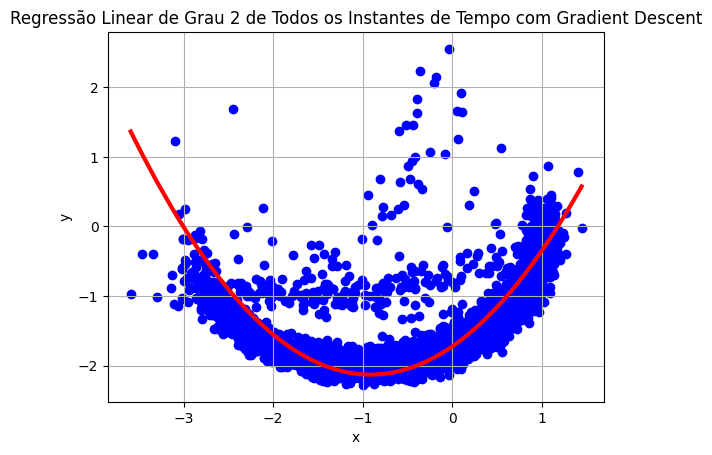

In [87]:
import numpy as np
import matplotlib.pyplot as plt

xo_25_all = []
yo_25_all = []


gamma = 0.001
theta_25 = np.array([0, 0, 0])
theta_25 = np.array(theta_25).T.reshape(-1, 1)

for j in range(len(time)):

  xo_25 = []
  yo_25 = []

  for i in range(len(Lidar_range[j])):
    
    if Lidar_range[j][i] > 0:
      xo_25.append(x_time[j] + Lidar_range[j][i]*np.cos(angle[i]*np.pi/180) ) 
      xo_25_all.append(x_time[j] + Lidar_range[j][i]*np.cos(angle[i]*np.pi/180) )
      yo_25.append(y_time[j] + Lidar_range[j][i]*np.sin(angle[i]*np.pi/180) )
      yo_25_all.append(y_time[j] + Lidar_range[j][i]*np.sin(angle[i]*np.pi/180) )
    
  if len(xo_25) != 0 and len(yo_25) != 0:

    X_25 = np.ones( ( len(xo_25), 1 ), dtype = float)
    X_25 = np.concatenate((X_25, np.array(xo_25).T.reshape(-1, 1)), axis=1)
    X_25 = np.concatenate((X_25, np.array(np.square(xo_25)).T.reshape(-1, 1)), axis=1)

    Y_25 = yo_25
    Y_25 = np.array(Y_25).T.reshape(-1, 1)

    Y_25regression = X_25 @ theta_25
    #calculate gradient
    gradJ = -2*(X_25.T @ (Y_25 - Y_25regression))

    theta_25 = theta_25 - gamma * gradJ

xo_25_all_plot = sorted(xo_25_all)
xo_25_all_plot = np.array(xo_25_all_plot).T.reshape(-1, 1)

X_25_all = np.ones( ( len(xo_25_all_plot), 1 ), dtype = float)
X_25_all = np.concatenate((X_25_all, xo_25_all_plot), axis=1)
X_25_all = np.concatenate((X_25_all, np.square(xo_25_all_plot)), axis=1)

Y_25_all = yo_25_all
Y_25_all = np.array(Y_25_all).T.reshape(-1, 1)

Y_25regression_all = X_25_all @ theta_25

############
# Plotting #
############

plt.figure()
plt.scatter(xo_25_all, Y_25_all, color="b")
plt.plot(xo_25_all_plot, Y_25regression_all,  color="r", linewidth=3)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Regressão Linear de Grau 2 de Todos os Instantes de Tempo com Gradient Descent")
plt.grid()

MSE_25 = our_mean_square_error(Y_25, Y_25regression)

print("\n")
print("THETA GRAU 2 COM GRADIENT DESCENT:\n", theta_25[0])
print("", theta_25[1])
print("", theta_25[2])
print("\n")
print("MSE GRAU 2 COM GRADIENT DESCENT:", MSE_25)
print("\n")

